# Import Libraries

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas.plotting as pdplt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from scipy import stats
from imblearn.over_sampling import SMOTE

# Load Dataset

In [92]:
spam = pd.read_csv( "spambase_remake.csv", index_col = 0)

# Display dataframe
spam.head()

,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,,,,,,,,,,,,,,,,,,,,,
0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [93]:
# information about data

spam.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4601 entries, 0.0 to 0.0
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_address           4601 non-null   float64
 1   word_freq_all               4601 non-null   float64
 2   word_freq_3d                4601 non-null   float64
 3   word_freq_our               4601 non-null   float64
 4   word_freq_over              4601 non-null   float64
 5   word_freq_remove            4601 non-null   float64
 6   word_freq_internet          4601 non-null   float64
 7   word_freq_order             4601 non-null   float64
 8   word_freq_mail              4601 non-null   float64
 9   word_freq_receive           4601 non-null   float64
 10  word_freq_will              4601 non-null   float64
 11  word_freq_people            4601 non-null   float64
 12  word_freq_report            4601 non-null   float64
 13  word_freq_addresses         46

# Data Exploration And Preprocessing

1. Checking Missing Values


In [94]:
# Check if there is missing values
missing = spam.isnull().sum()

# Printing numbers of missing values in each column
print("Missing Values")
print(missing)


Missing Values
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_freq_857            

There are no missing values in the dataset

2. Check the class distribution

In [95]:
class_counts = spam['spam'].value_counts()

# Print the class distribution
print("Class distribution:")
print(class_counts)
print(spam.shape)



Class distribution:
0    2788
1    1813
Name: spam, dtype: int64
(4601, 57)


There is  imbalance between spam and non spam data so resampling will be needed.

3. distribution of each feature

In [96]:
# Displaying distribution of each feature
print("Distribution of each feature:")
print(spam.describe())

Distribution of each feature:
       word_freq_address  word_freq_all  word_freq_3d  word_freq_our  \
count        4601.000000    4601.000000   4601.000000    4601.000000   
mean            0.213015       0.280656      0.065425       0.312223   
std             1.290575       0.504143      1.395151       0.672513   
min             0.000000       0.000000      0.000000       0.000000   
25%             0.000000       0.000000      0.000000       0.000000   
50%             0.000000       0.000000      0.000000       0.000000   
75%             0.000000       0.420000      0.000000       0.380000   
max            14.280000       5.100000     42.810000      10.000000   

       word_freq_over  word_freq_remove  word_freq_internet  word_freq_order  \
count     4601.000000       4601.000000         4601.000000      4601.000000   
mean         0.095901          0.114208            0.105295         0.090067   
std          0.273824          0.391441            0.401071         0.278616   
m

4. Checking correlation between the features

Correlation between features:
                            word_freq_address  word_freq_all  word_freq_3d  \
word_freq_address                    1.000000      -0.033526     -0.006923   
word_freq_all                       -0.033526       1.000000     -0.020246   
word_freq_3d                        -0.006923      -0.020246      1.000000   
word_freq_our                       -0.023760       0.077734      0.003238   
word_freq_over                      -0.024840       0.087564     -0.010014   
word_freq_remove                     0.003918       0.036677      0.019784   
word_freq_internet                  -0.016280       0.012003      0.010268   
word_freq_order                     -0.003826       0.093786     -0.002454   
word_freq_mail                       0.032962       0.032075     -0.004947   
word_freq_receive                   -0.006864       0.048254     -0.012976   
word_freq_will                      -0.040398       0.083210     -0.019221   
word_freq_people                  

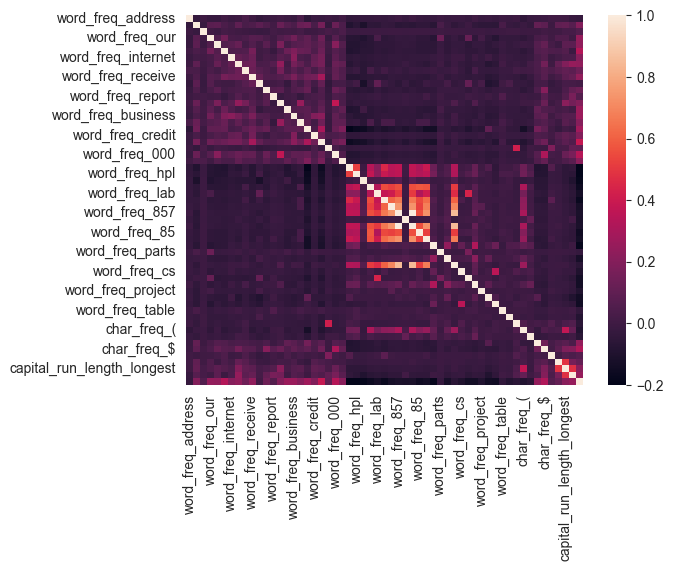

In [97]:
# the correlation matrix
correlation_matrix = spam.corr()

# Display the correlation matrix
print("Correlation between features:")
print(correlation_matrix)

#heatmap to visualize the correlation matrix between features
correlation_matrix = spam.corr()
sns.heatmap(correlation_matrix, vmin=-0.2, vmax=1)
plt.show()

C:\Users\kasun\AppData\Local\Temp\ipykernel_26024\2088957206.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(correlations.index, rotation=90)


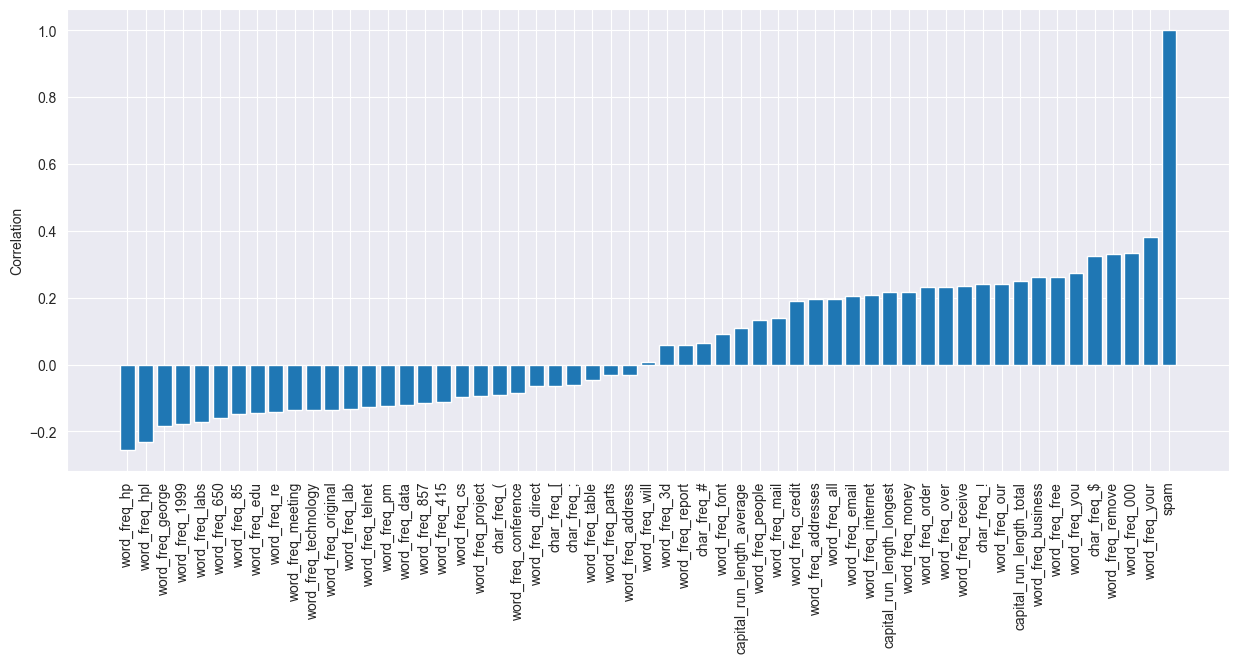

In [98]:
#correlation between feature and the target variable
correlations = spam.corr()['spam'].sort_values()

#bar chart of the correlations
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(correlations.index, correlations)
ax.set_xticklabels(correlations.index, rotation=90)
ax.set_ylabel('Correlation')
plt.show()


It seems there is good correlation between some features so trying dimensionality reduction method like PCA may improve model performance.

5. Visualize the distribution of each feature

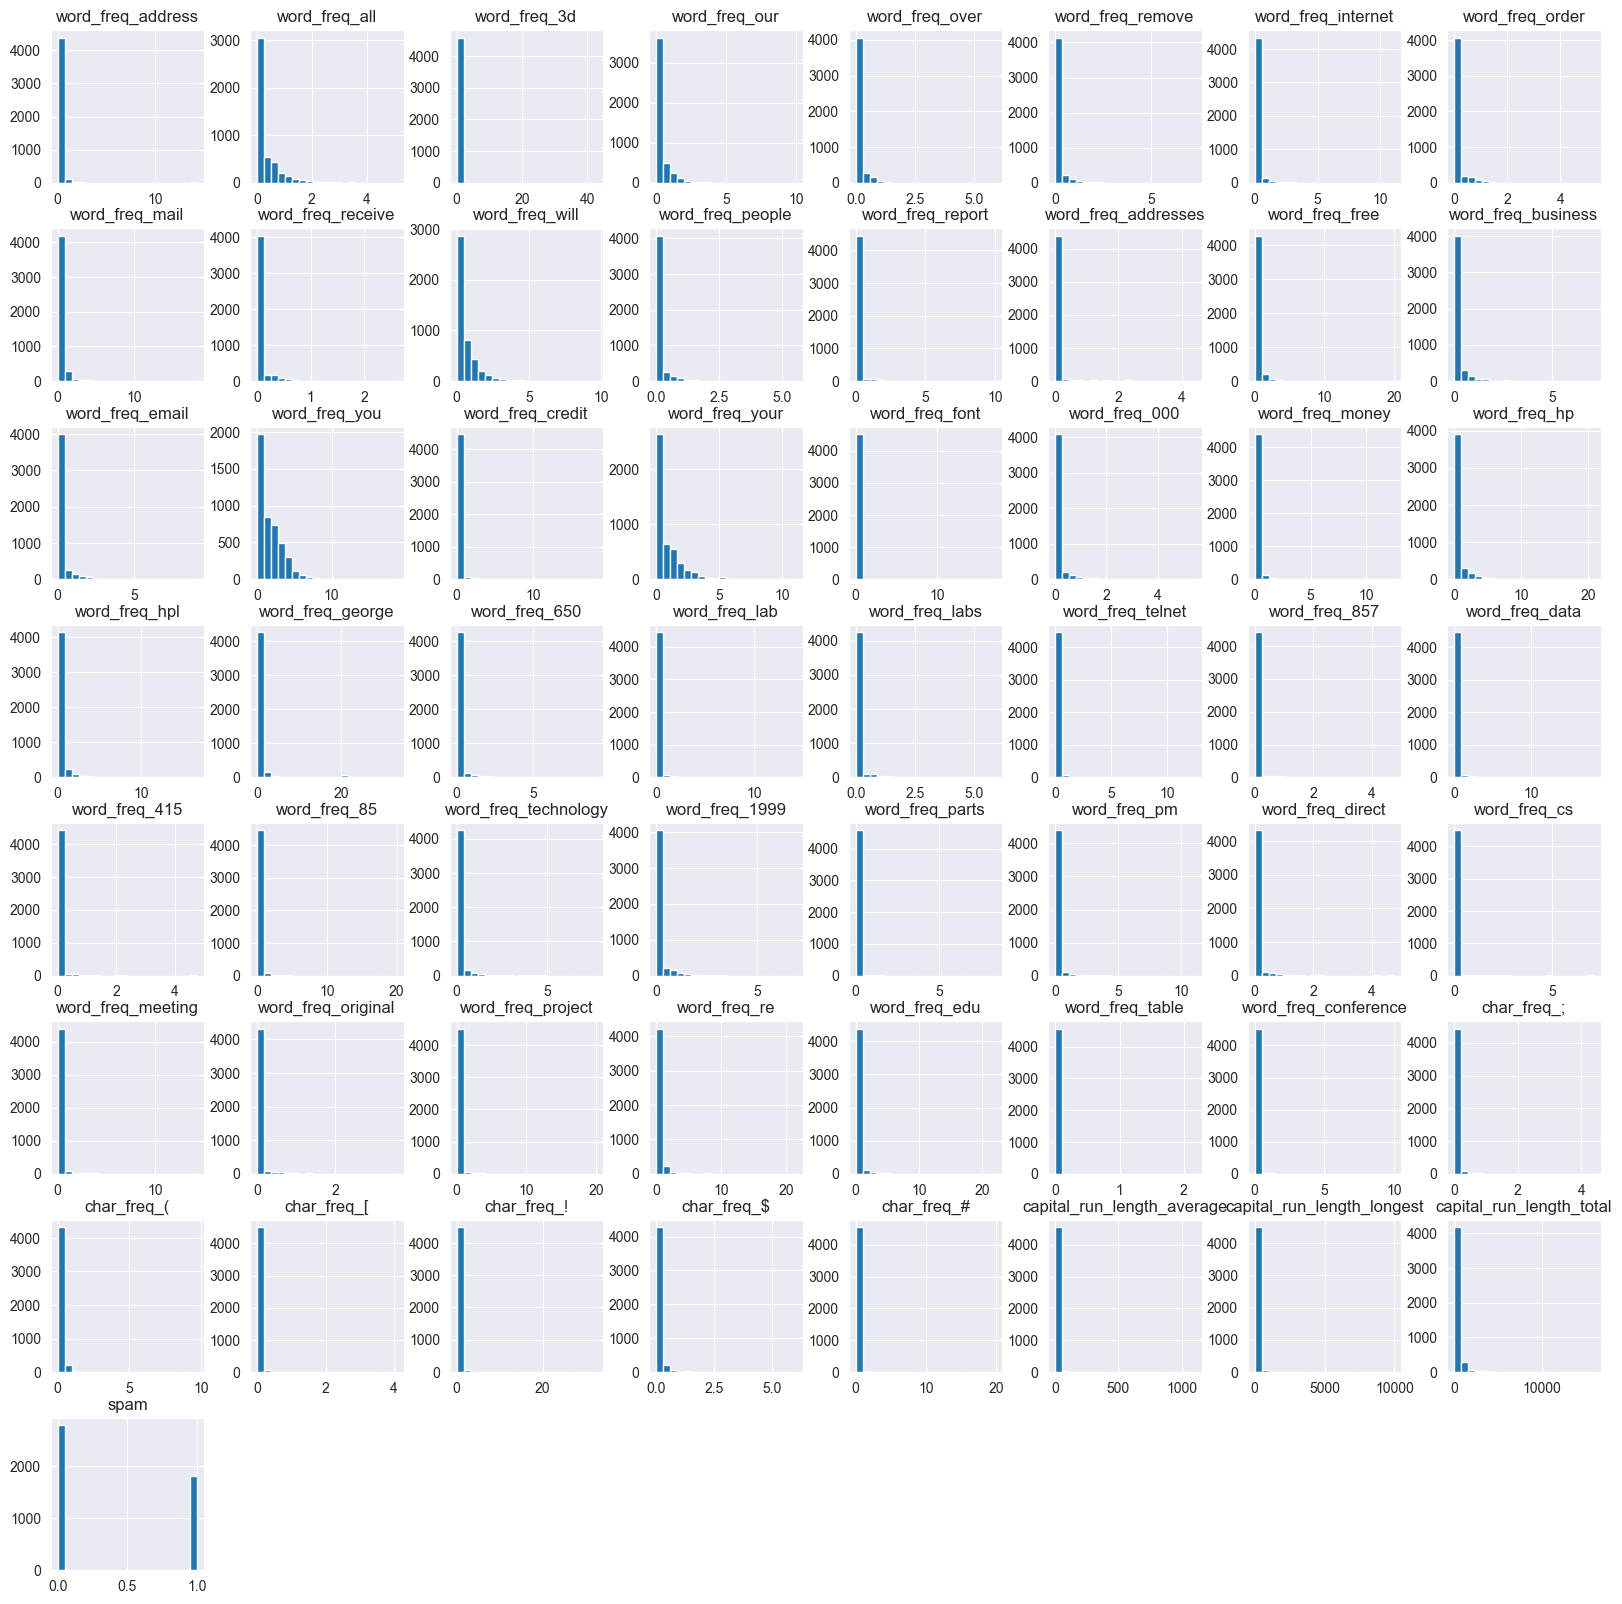

In [99]:
#histograms to visualize the distribution of each feature
spam.hist(figsize=(20,20), bins=20)
plt.show()

6. Finding Outliers

IndexError: index 50 is out of bounds for axis 0 with size 50

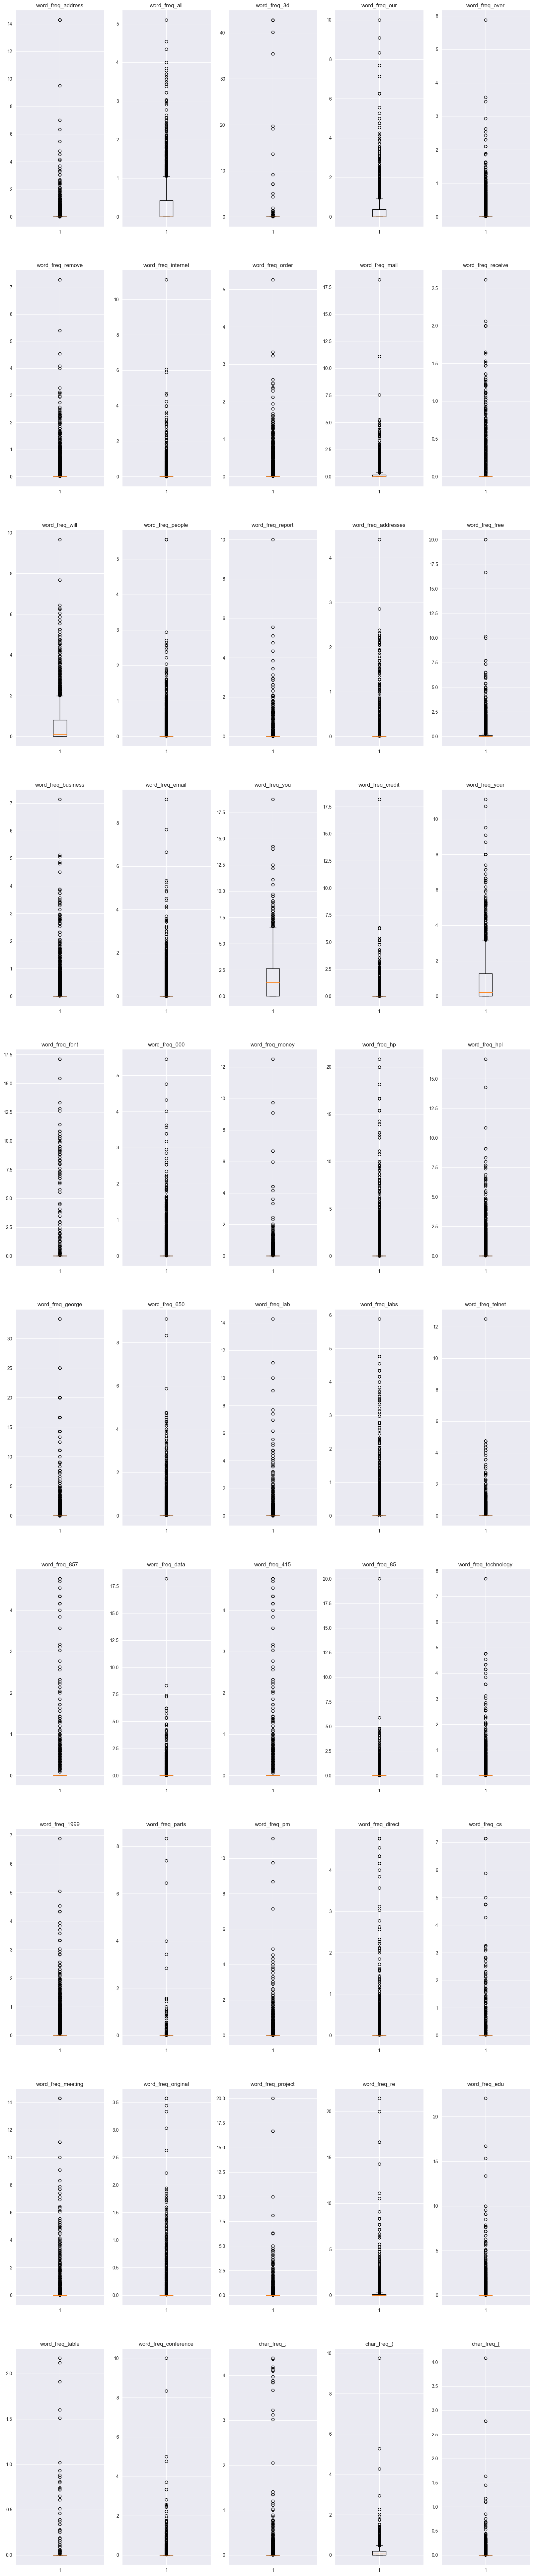

In [100]:
#Plotting box plots to identify outliers
fig, axs = plt.subplots(ncols=5, nrows=10, figsize=(20, 100))
axs = axs.flatten()
for i, col in enumerate(spam.columns[:-1]):
    axs[i].boxplot(spam[col])
    axs[i].set_title(col)

plt.show()

In [105]:
# calculate z-scores
z_scores = stats.zscore(spam)

# set a limit for z-score
zScoreLimit = 3

# find the indices of outliers
outlier_indices = np.where(np.abs(z_scores) > zScoreLimit)

# calculate the total number of outliers
num_outliers = len(outlier_indices[0])

print("Total number of outliers = ", num_outliers)


Total number of outliers =  4044


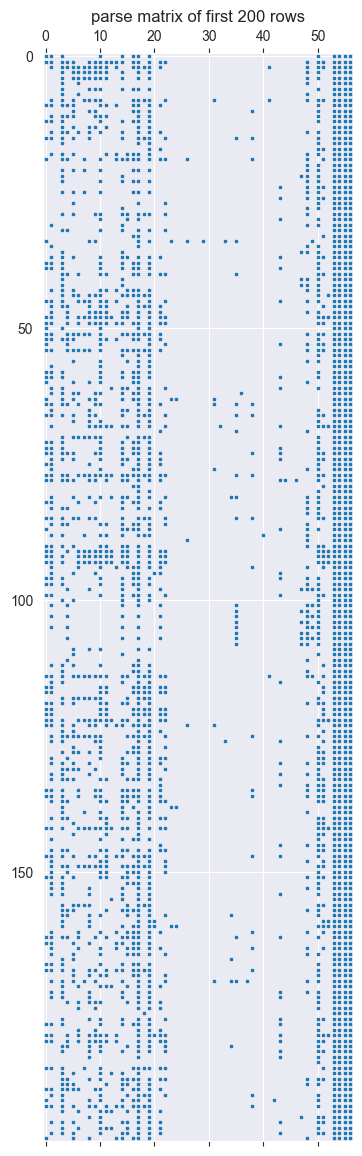

In [107]:
#Plotting Sparse Matrix
plt.figure(figsize=[4, 600])
plt.title('parse matrix of first 200 rows')
# first 200 and precision is set to 0.1
plt.spy(spam.head(200), precision=0.1, markersize=2)
plt.show()


According to the z-score method, there seem to be around 4000 outliers in the dataset. Since the majority of data points are close to zero, a small deviation from the mean can result in a large change in z-score, resulting in the identification of a large number of potential outliers. Therefore, I analyse the above distribution of each feature and box plot. In my view, there are only a few significant outliers. Furthermore, we cannot guarantee that those are true outliers because they could be special cases. As a result, I decided not to remove any outliers from the dataframe

7. Removing Duplicate Records

In [108]:
# Counting the number of duplicate rows
duplicates = spam.duplicated().sum()
print("Duplicate rows = ", duplicates)

# Drop the duplicate rows and update the dataset
spam.drop_duplicates(inplace=True)

# Verify there are no more duplicate records
assert spam.duplicated().sum() == 0
print("No more duplicate records")

word_freq_make
0.00    False
0.21    False
0.06    False
0.00    False
0.00    False
        ...  
0.31    False
0.00    False
0.30    False
0.96    False
0.00    False
Length: 4601, dtype: bool
Duplicate rows =  391
No more duplicate records


There were 391 duplicate rows, so those records were dropped from the dataframe.

In [ ]:
# Separate features and target variable
X = spam.drop('spam', axis=1)
y = spam['spam']

# Create SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)
# Concatenate resampled features and target variable into a new dataframe
resampled_data = pd.concat([X_resampled, y_resampled], axis=1)

# Print the new dataframe
print(resampled_data)
print(resampled_data['spam'].value_counts())
